<a href="https://colab.research.google.com/github/FF132FF/methods-and-algorithms-of-digital-image-processing/blob/main/Using_the_sliding_window_method_to_filter_images_and_searching_for_objects_in_an_image_using_patterns_in_the_Python_environment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def median_filter(original_image):
    try:
        image = original_image

        # применяем медианный фильтр 3x3 к исходному изображению
        processed_image = cv2.medianBlur(image, 3)

        # произведение конкатенации исходных изображений с изображениями, полученными в результате их обработки
        concatenate = np.concatenate((image, processed_image), axis=1)

        # отображение полученной конкатенации
        cv2_imshow(concatenate)

        return "Отображена конкатенация на которой видно, как изменилось изображение в результате обработки"
    except:
        return "Не удалось обработать изображение"

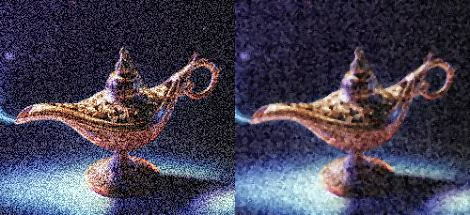

Отображена конкатенация на которой видно, как изменилось изображение в результате обработки


In [ ]:
# считываем исходное изображение, которое будем обрабатывать медианным фильтром
image = cv2.imread("/content/shum1.jfif") # путь к исходному изображению

print(median_filter(image))

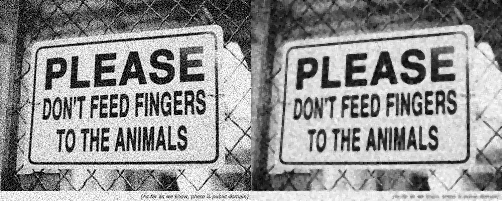

Отображена конкатенация на которой видно, как изменилось изображение в результате обработки


In [ ]:
# считываем исходное изображение, которое будем обрабатывать медианным фильтром
image = cv2.imread("/content/shum2.jfif") # путь к исходному изображению

print(median_filter(image))

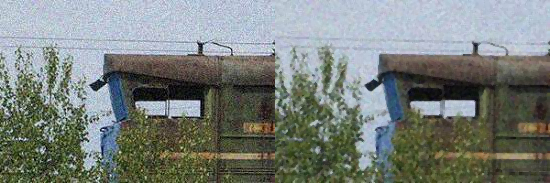

Отображена конкатенация на которой видно, как изменилось изображение в результате обработки


In [ ]:
# считываем исходное изображение, которое будем обрабатывать медианным фильтром
image = cv2.imread("/content/shum3.jfif") # путь к исходному изображению

print(median_filter(image))

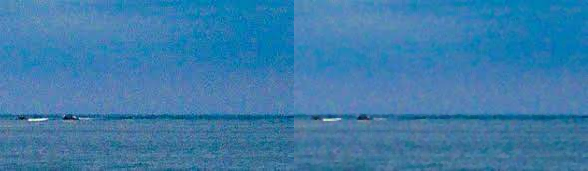

Отображена конкатенация на которой видно, как изменилось изображение в результате обработки


In [ ]:
# считываем исходное изображение, которое будем обрабатывать медианным фильтром
image = cv2.imread("/content/shum4.jfif") # путь к исходному изображению

print(median_filter(image))

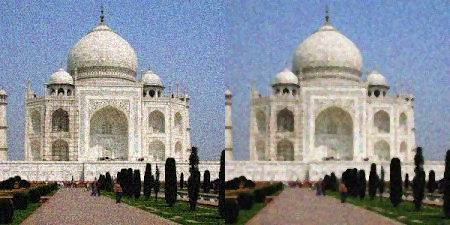

Отображена конкатенация на которой видно, как изменилось изображение в результате обработки


In [ ]:
# считываем исходное изображение, которое будем обрабатывать медианным фильтром
image = cv2.imread("/content/shum5.jfif") # путь к исходному изображению

print(median_filter(image))

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def mid_pass_filter(original_image):
    try:
        image = original_image

        # подготовка фильтра в виде матрицы 3x3
        kernel = np.ones((3,3),np.float32)/9

        # применяем фильтр средних частот 3x3 к исходному изображению
        processed_image = cv2.filter2D(image,-1,kernel)

        # произведение конкатенации исходного изображения с изображением, полученным в результате обработки
        concatenate = np.concatenate((image, processed_image), axis=1)

        # отображение полученной конкатенации
        cv2_imshow(concatenate)

        return "Отображена конкатенация на которой видно, как изменилось изображение в результате обработки"
    except:
        return "Не удалось обработать изображение"

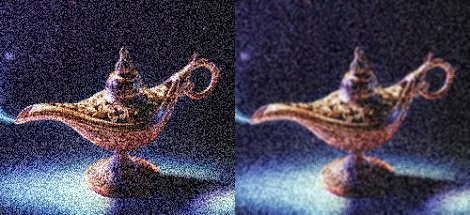


Отображена конкатенация на которой видно, как изменилось изображение в результате обработки


In [ ]:
# считываем исходное изображение, которое будем обрабатывать фильтром средних частот
image = cv2.imread("/content/shum1.jfif") # путь к исходному изображению

print(mid_pass_filter(image))

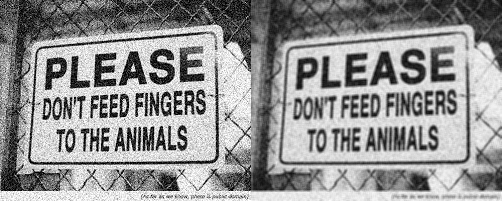


Отображена конкатенация на которой видно, как изменилось изображение в результате обработки


In [ ]:
# считываем исходное изображение, которое будем обрабатывать фильтром средних частот
image = cv2.imread("/content/shum2.jfif") # путь к исходному изображению

print(mid_pass_filter(image))

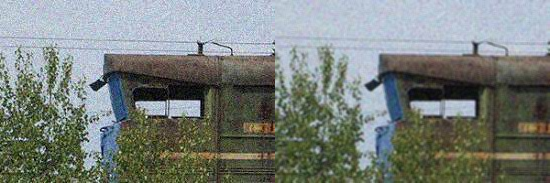


Отображена конкатенация на которой видно, как изменилось изображение в результате обработки


In [ ]:
# считываем исходное изображение, которое будем обрабатывать фильтром средних частот
image = cv2.imread("/content/shum3.jfif") # путь к исходному изображению

print(mid_pass_filter(image))

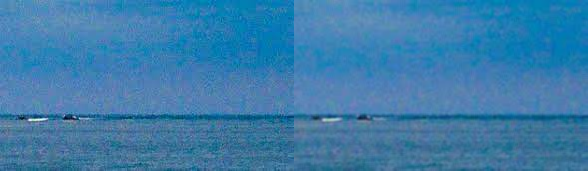


Отображена конкатенация на которой видно, как изменилось изображение в результате обработки


In [ ]:
# считываем исходное изображение, которое будем обрабатывать фильтром средних частот
image = cv2.imread("/content/shum4.jfif") # путь к исходному изображению

print(mid_pass_filter(image))

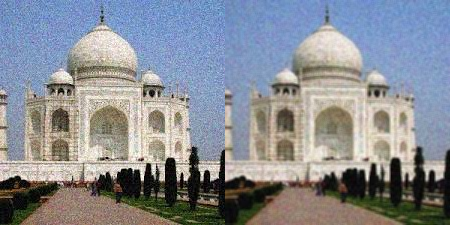


Отображена конкатенация на которой видно, как изменилось изображение в результате обработки


In [ ]:
# считываем исходное изображение, которое будем обрабатывать фильтром средних частот
image = cv2.imread("/content/shum5.jfif") # путь к исходному изображению

print(mid_pass_filter(image))

In [ ]:
import cv2
import imutils

def search_function(original_image, fragment_of_image):
    try:
        image = original_image
        fragment = fragment_of_image
        # вычисляем параметры для каждого фрагмента (высота, ширина)
        (fragmentHeight, fragmentWidth) = fragment.shape[:2]

        # осуществляем поиск фрагментов на исходном изображении
        result = cv2.matchTemplate(image, fragment, cv2.TM_CCOEFF)
        (_, _, minLoc, maxLoc) = cv2.minMaxLoc(result)

        # выделяем искомые фрагменты и отделяем их от исходного изображения
        topLeft = maxLoc
        botRight = (topLeft[0] + fragmentWidth, topLeft[1] + fragmentHeight)
        roi = image[topLeft[1]:botRight[1], topLeft[0]:botRight[0]]

        # cоздаем затемненный прозрачный слой, для затемнения всей части изображения
        mask = np.zeros(image.shape, dtype="uint8")
        image = cv2.addWeighted(image, 0.20, mask, 0.75, 0)

        # возвращаем искомый фрагмент в изображении
        image[topLeft[1]:botRight[1], topLeft[0]:botRight[0]] = roi

        cv2_imshow(image)
        cv2_imshow(fragment)

        return "Фрагмент найден и выделен на исходном изображении"
    except:
        return "Не удалось найти и выделить фрагмент на исходном изображении"

In [ ]:
# считываем изображения, фрагменты которого будем искать
image = cv2.imread("/content/poiskMain.jpg") # путь к исходному изображению

# считываем фрагмент изображения, который будем искать на исходнои изображении
fragment = cv2.imread("/content/poisk1.png") # путь к фрагменту исходного изображения

print(search_function(image, fragment))

In [ ]:
# считываем фрагмент изображения, который будем искать на исходнои изображении
fragment = cv2.imread("/content/poisk2.png") # путь к фрагменту исходного изображения

print(search_function(image, fragment))

In [ ]:
# считываем фрагмент изображения, который будем искать на исходнои изображении
fragment = cv2.imread("/content/poisk3.png") # путь к фрагменту исходного изображения

print(search_function(image, fragment))

In [ ]:
# считываем фрагмент изображения, который будем искать на исходнои изображении
fragment = cv2.imread("/content/poisk4.png") # путь к фрагменту исходного изображения

print(search_function(image, fragment))

In [ ]:
# считываем фрагмент изображения, который будем искать на исходнои изображении
fragment = cv2.imread("/content/poisk5.png") # путь к фрагменту исходного изображения

print(search_function(image, fragment))

In [ ]:
# считываем фрагмент изображения, который будем искать на исходнои изображении
fragment = cv2.imread("/content/poisk6.png") # путь к фрагменту исходного изображения

print(search_function(image, fragment))

In [ ]:
# считываем фрагмент изображения, который будем искать на исходнои изображении
fragment = cv2.imread("/content/poisk7.png") # путь к фрагменту исходного изображения

print(search_function(image, fragment))

In [ ]:
# считываем фрагмент изображения, который будем искать на исходнои изображении
fragment = cv2.imread("/content/poisk8.png") # путь к фрагменту исходного изображения

print(search_function(image, fragment))

In [ ]:
# считываем фрагмент изображения, который будем искать на исходнои изображении
fragment = cv2.imread("/content/poisk9.png") # путь к фрагменту исходного изображения

print(search_function(image, fragment))

In [ ]:
# считываем фрагмент изображения, который будем искать на исходнои изображении
fragment = cv2.imread("/content/poisk10.png") # путь к фрагменту исходного изображения

print(search_function(image, fragment))